<a href="https://colab.research.google.com/github/Aishwarya2k7/TFlow/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.0


In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_data,train_label),(test_data,test_label) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
print(train_data.shape)
print(test_data.shape)
print(train_label)

(60000, 28, 28)
(10000, 28, 28)
[9 0 0 ... 3 0 5]


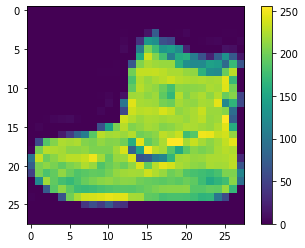

In [ ]:
plt.figure()
plt.imshow(train_data[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_data = train_data/255.0
test_data = test_data/255.0

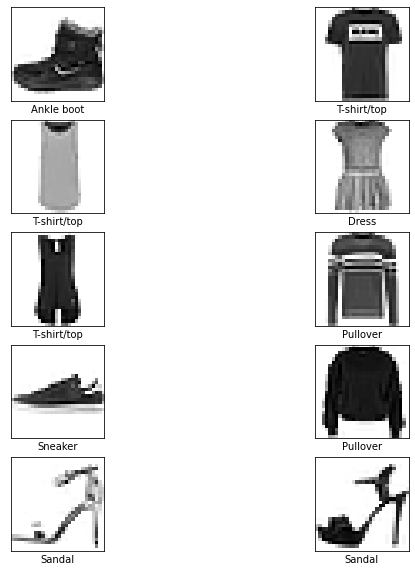

In [ ]:
plt.figure(figsize=(10,10))
for i in range(10):
  plt.subplot(5,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_data[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28,28)),
                             tf.keras.layers.Dense(128,activation='relu'),
                             tf.keras.layers.Dense(10)
])

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.fit(train_data,train_label,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6362 - accuracy: 0.7819
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3894 - accuracy: 0.8610
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8746
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3180 - accuracy: 0.8825
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2957 - accuracy: 0.8920
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2808 - accuracy: 0.8958
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9029
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2575 - accuracy: 0.9032
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2485 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

In [ ]:
test_loss, test_acc = model.evaluate(test_data,test_label,verbose=2)
print("Test accuracy=", test_acc)

313/313 - 0s - loss: 0.3524 - accuracy: 0.8742
Test accuracy= 0.8741999864578247


In [ ]:
prob_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = prob_model.predict(test_data)

In [ ]:
predictions[0]

array([3.3037040e-07, 1.7966963e-09, 4.7338112e-08, 8.7775227e-09,
       1.9973938e-10, 1.0045875e-03, 4.1704544e-07, 1.1898351e-02,
       3.1617514e-08, 9.8709631e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

In [ ]:
test_label[0]

9